# STU22004 Applied Probablity Group Project
----
| Team members| Student ID|
|-------------|---------|
|Leon Andorfi|23335878|
|Joel Matthew Jojan|23330000|
|Aryan Kapoor|23330000|
|Zicheng Liang|23331250|

Installing dependencies
Have python3 running on your machine
Create a virtual environment `python3 -m venv venv` in your current working directory
Enter the virtual environment `source .venv/bin/activate`, run `pip install -r requirements.txt` to install all dependencies

In [1]:
import pandas as pd
import numpy as np
import matplot as mp
import seaborn as sns
import random
import json
from collections import defaultdict
from collections import Counter
# 60 sec * 90 min = 5400 secs 
# 5400 / 30 (30s per tick)
simulation_tick = 180 
teams = []

import matplotlib.pyplot as plt

## Question 1: Temperature Modeling

Consider a scenario where the temperature X(t) varies randomly over a continuous time interval t, where t is in the range from 0 to 1. We begin with the assumption that X(0) = 0, which means that the temperature at time 0 is 0. Now, if we choose a small time increment represented by ∆t, we can make the assumption that the change in temperature from time t to t + ∆t, denoted as X(t+ ∆t)− X(t), follows a normal distribution. This normal distribution is characterized by a mean of 0 and a variance of ∆t.

1. Let $P$ be the random variable denoting the proportion of time in [0, 1] such that the temperature is positive. Estimate the distribution of $P$ by Monte Carlo simulation and experimenting with various values of ∆t (e.g. ∆t = 0.01, 0.001, 0.0001, · · · .)
2. Let $T_{max}$ be the random variable denoting the time in [0, 1] such that the temperature is at its maximum. Estimate the distribution of $T_{max}$ by Monte Carlo simulation and experimenting with various values of ∆t (e.g. ∆t = 0.01, 0.001, 0.0001, · · · .)

We will first plot the distribution estimate for $P$ when $∆t = 0.01$. We will pick the number of simulations to be 1000. Since the temperature change from some time $t$ to $t + ∆t$ is normally distributed, within each simulation we will sample $1/∆t$ values from a normal distribution with 0 mean and $\sqrt∆t$ standard deviation. Then, starting from time 0 and temperature 0, we will add the temperature changes one by one, and for each change record whether the current temperature is positive or not.

In [2]:
# Parameters we can choose

deltaT = 0.01
num_simulations = 1000

Formally, for $n=\frac{1}{\Delta t}$ samples $\left\{ s_1, s_2, \dots, s_n \right\}$, we define the proportion of positive temperatures $p$ as
$p=\frac{1}{n}\sum_{k=1}^{n}\textbf{1}_\mathbb{R^+}\left( \sum_{i=1}^{k} s_i \right)$, where $\textbf{1}_\mathbb{R^+}$ is the indicator function of the set of positive reals, defined as
$$
\textbf{1}_\mathbb{R^+}(x) =
\begin{cases}
1 & \text{if } x \in R^+, \\
0 & \text{if } x \notin R^+.
\end{cases}
$$

In [3]:
def get_positive_proportion(arr):
    num = cur = 0
    for t in arr:
        cur += t
        num += int(cur > 0)
    return num / arr.shape[0]

def get_P(deltaT, num_simulations=1000):
    num_temp_changes = int(1 / deltaT)
    temp_changes = np.random.normal(0, np.sqrt(deltaT), (num_simulations, num_temp_changes))
    return np.array(list(map(get_positive_proportion, temp_changes)))

Finally, we plot the computed values of $\left\{ p_1, p_2, \dots, p_m \right\}$ where $m$ is the number of simulations performed ($m=1000$ in our case).

Text(0, 0.5, 'Frequency')

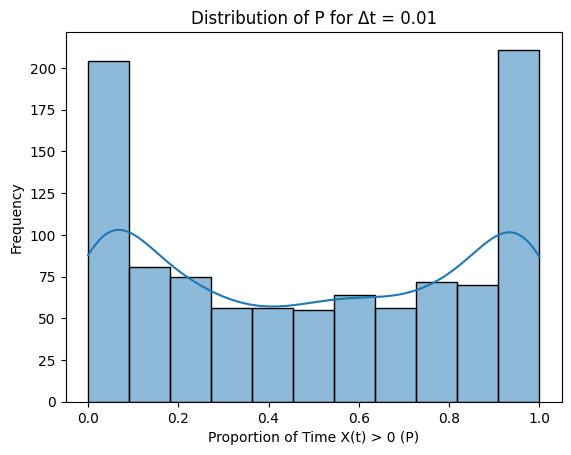

In [4]:
proportions = get_P(deltaT, num_simulations)
sns.histplot(proportions, kde=True)
plt.title(f'Distribution of P for Δt = {deltaT}')
plt.xlabel('Proportion of Time X(t) > 0 (P)')
plt.ylabel('Frequency')

Next step is to plot the distribution estimates for $\Delta t = 0.01, 0.001, 0.0001, 0.00001$.

In [5]:
deltaTs = [0.01, 0.001, 0.0001, 0.00001]
P_values = [get_P(delta_t) for delta_t in deltaTs]

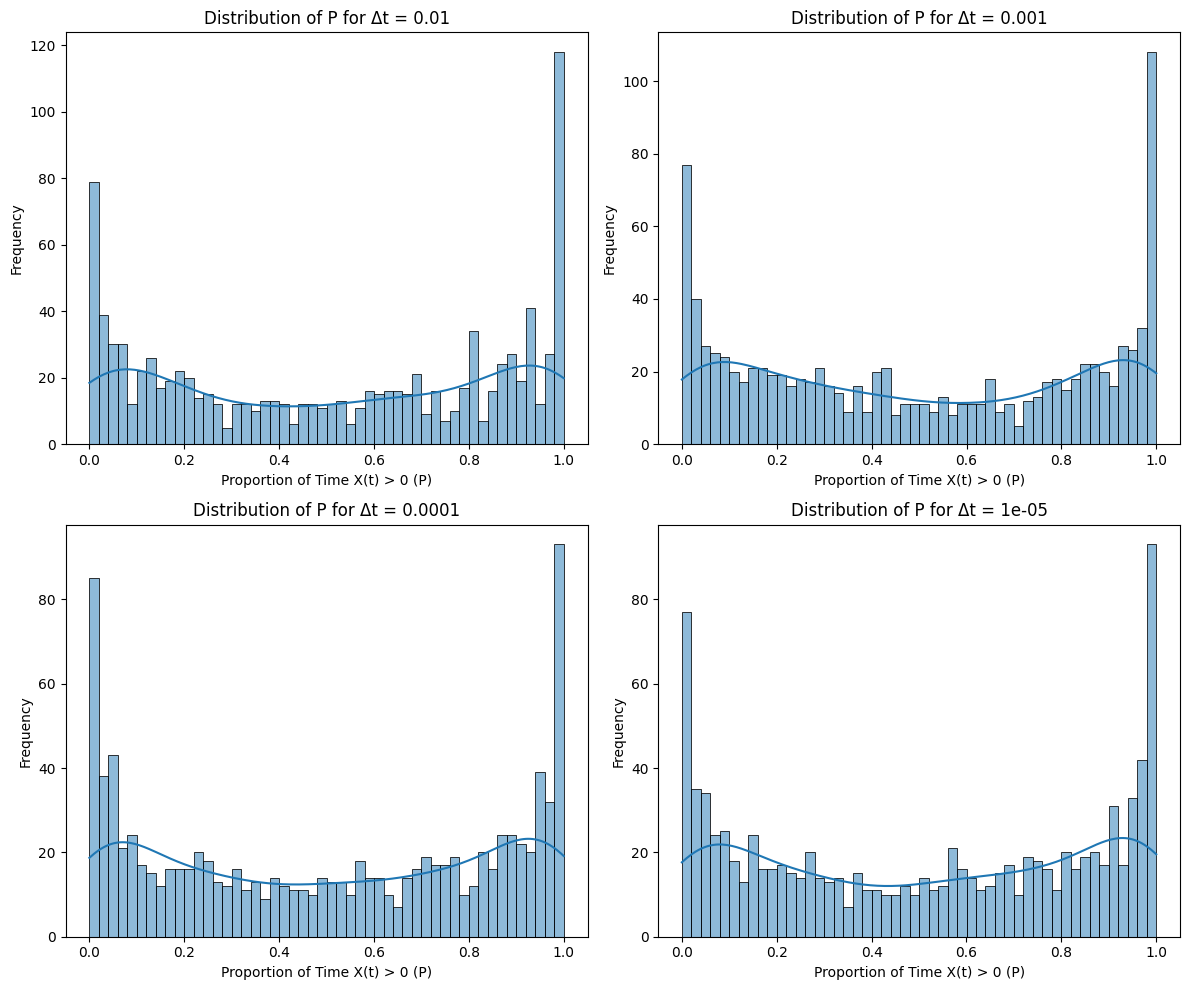

In [6]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, P_value in enumerate(P_values):
    sns.histplot(P_value, kde=True, bins=50, ax=axes[idx])
    axes[idx].set_title(f'Distribution of P for Δt = {deltaTs[idx]}')
    axes[idx].set_xlabel('Proportion of Time X(t) > 0 (P)')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The following table contains mean and variance estimates for value of $\Delta t$.

In [7]:
means = [p.mean() for p in P_values]
vars = [p.var() for p in P_values]
dist_df = pd.DataFrame(list(zip(deltaTs, means, vars)), columns=['Δt', 'Mean', 'Variance'])
dist_df

,Δt,Mean,Variance
0,0.01000,0.512190,0.128842
1,0.00100,0.499827,0.126012
2,0.00010,0.506383,0.125747
3,0.00001,0.513496,0.124251


Now we turn to estimating the distribution of $T_{max}$. Similarly to $P$, The time at which the temperature is at its maximum can be defined as $t_{max}=\frac{1}{n}\underset{k \in S}{\argmax} \left( \sum_{i=1}^{k} s_i \right)$ where $n=\frac{1}{\Delta t}$, $\left\{ s_1, s_2, \dots, s_n \right\}$ are the temperature change samples and $S=\left\{ x \in \mathbb{N} \mid x \le n \right\}$.

In [8]:
def get_max(arr):
    max_val = max_ind = cur = 0
    for i in range(arr.shape[0]):
        cur += arr[i]
        max_val = max(max_val, cur)
        max_ind = i if max_val == cur else max_ind

    return max_ind / arr.shape[0]

def get_Tmax(deltaT, num_simulations=1000):
    num_temp_changes = int(1 / deltaT)
    temp_changes = np.random.normal(0, np.sqrt(deltaT), (num_simulations, num_temp_changes))
    return np.array(list(map(get_max, temp_changes)))

In [9]:
Tmax_values = [get_Tmax(delta_t) for delta_t in deltaTs]

The following are the distribution estimates for $T_{max}$ when $\Delta t = 0.01, 0.001, 0.0001, 0.00001$.

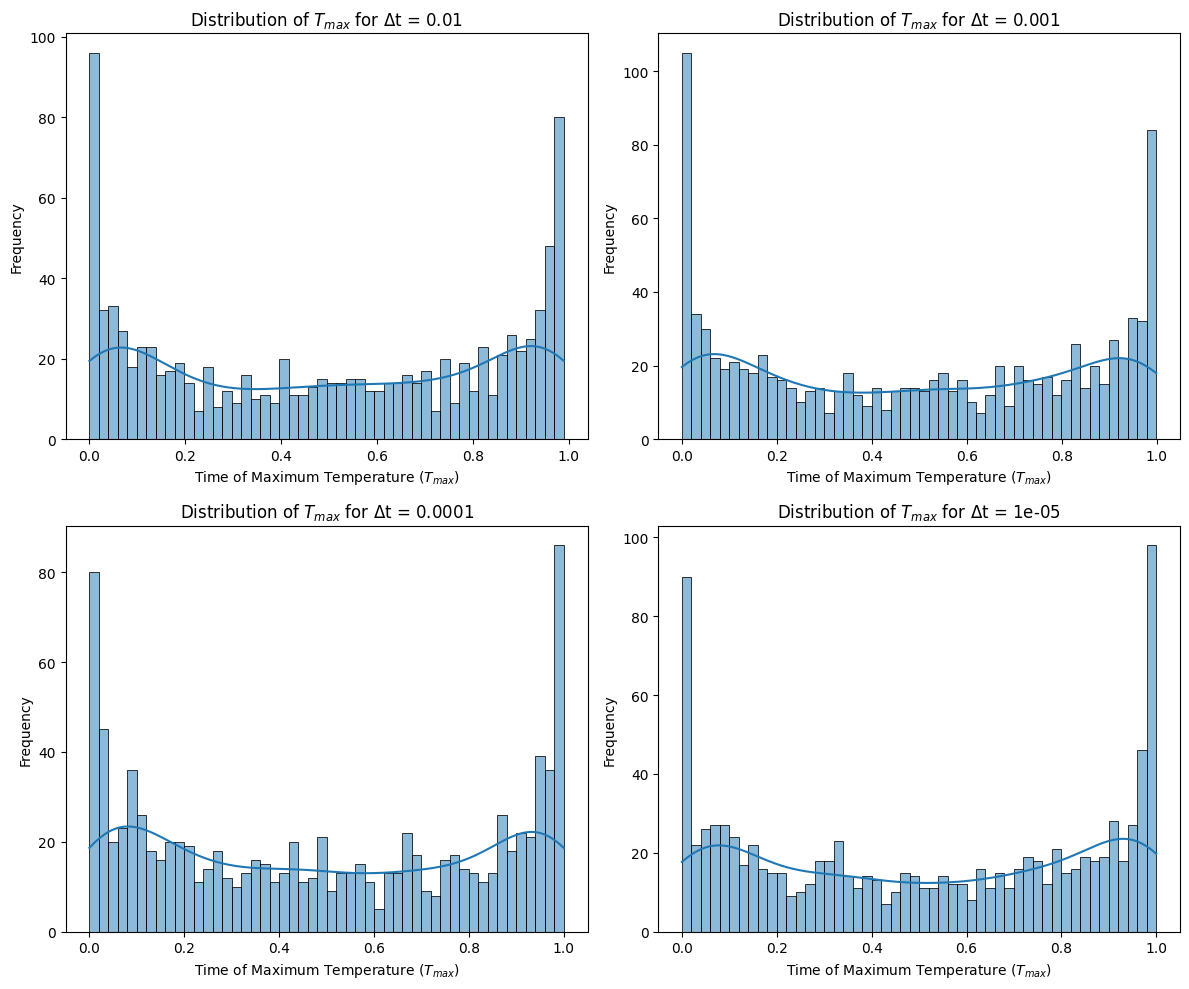

In [10]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, Tmax_value in enumerate(Tmax_values):
    sns.histplot(Tmax_value, kde=True, bins=50, ax=axes[idx])
    axes[idx].set_title(f'Distribution of $T_{{max}}$ for Δt = {deltaTs[idx]}')
    axes[idx].set_xlabel('Time of Maximum Temperature ($T_{max}$)')
    axes[idx].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

The following table contains mean and variance estimates for value of $\Delta t$.

In [11]:
means = [t.mean() for t in Tmax_values]
vars = [t.var() for t in Tmax_values]
dist_df = pd.DataFrame(list(zip(deltaTs, means, vars)), columns=['Δt', 'Mean', 'Variance'])
dist_df

,Δt,Mean,Variance
0,0.01000,0.498760,0.125746
1,0.00100,0.493629,0.124953
2,0.00010,0.492951,0.123717
3,0.00001,0.512419,0.124837


### Analysis of Results

Distribution estimates of $P$ and $T_{max}$ seem to suggest that both random variables have identical distributions, with $\mu \approx 0.5$ and $\sigma^2 \approx 0.125$. A notable characteristic of both distributions are the heavy tails at 0 and 1. Simulating how the temperature changes over time for a few samples, we notice that some paths keep hovering over 0, shifting from positive to negative and negative and positive values. However, a good portion of paths start with a wave of positive/negative changes, and thus never go down/up to 0. These samples will have either $t_{max}=p=0$ (negative values at start) or $t_{max}=p=1.0$ (positive values at start).

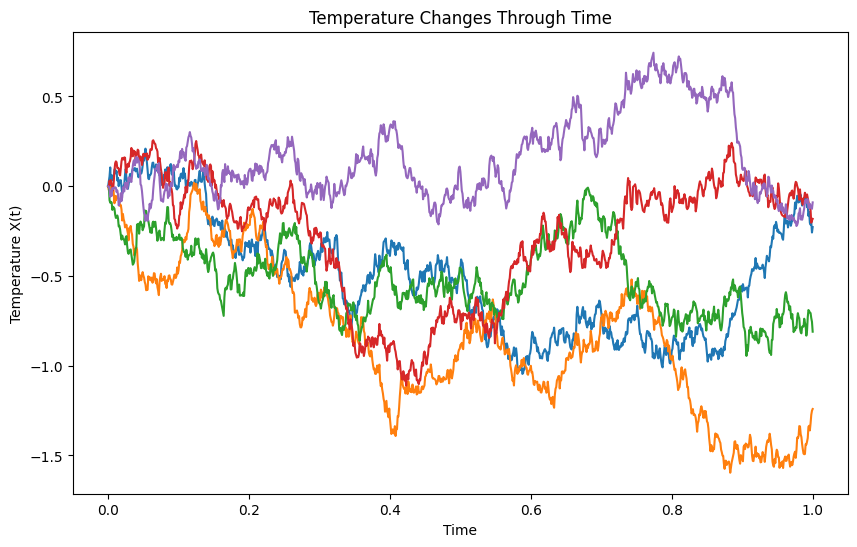

In [12]:
def simulate_change(delta_t):
    N_steps = int(1 / delta_t)
    dX = np.random.normal(0, np.sqrt(delta_t), size=N_steps)
    X = np.concatenate(([0], np.cumsum(dX)))
    time_grid = np.linspace(0, 1, N_steps + 1)
    return time_grid, X

delta_t = 0.001
num_paths = 5
plt.figure(figsize=(10, 6))

for _ in range(num_paths):
    t, X = simulate_change(delta_t)
    plt.plot(t, X)

plt.title('Temperature Changes Through Time')
plt.xlabel('Time')
plt.ylabel('Temperature X(t)')
plt.show()


-----
## Premier League Forecasting – Model Description
Our predictive model for Premier League matches uses a simulation-based approach, underpinned by player statistics extracted using the datascraper.py script. This script gathers comprehensive data from FBref and outputs a players.json file, which serves as the foundation for determining individual player attributes and team dynamics.

### Simulation Framework
The simulation operates on a time-based system. Matches are simulated incrementally in discrete time "ticks." Each tick represents a specific period within the game where players make decisions and interact with the ball. The process begins with a random home-team player (excluding the goalkeeper) taking the kick-off and passing to a teammate.

At each tick, the player in possession of the ball has the following possible outcomes (events) :

1. __Pass the Ball__: The player attempts to pass the ball, influenced by their passing accuracy and team tactics.
2. __Shoot__: The player attempts a shot, with a scoring probability calculated based on historical data, their position, and individual scoring ability.
3. __Lose Possession__: The player loses the ball, either due to interception, tackle, or misplay, transitioning control to the opposing team.
4. __Retain Possession__: If none of the above occurs, the player holds the ball until the next tick.
Parameterization

The likelihood of each event is dynamically computed using the collected data:

- __Passing Probabilities__: Depend on player attributes (e.g., passing accuracy) and their role (e.g., midfielders are more likely to pass forward compared to defenders).
- __Shooting Probabilities__: Reflect player-specific data (e.g., historical goal conversion rates) and contextual factors such as distance to goal and defensive pressure.
- __Losing Possession__: Influenced by player stats (e.g., ball retention ability) and opposing team's defensive strength.

### Monte Carlo Simulations
For each match, we simulate thousands of iterations, each representing a potential outcome. Key outcomes (home win, away win, or draw) are determined based on goal differentials across these simulations. Each simulation records:

- Goals scored by both teams
- Match outcomes (win/loss/draw)
- Possession statistics

### Season Simulation
To forecast final league standings:

1. __Match Simulation__: Each match in the season is simulated multiple times.
2. __Aggregate Results__: The average number of wins, draws, and losses for each team is calculated.
3. __Final Points__: Points are assigned (3 for a win, 1 for a draw, 0 for a loss) to determine the final standings.
4. __Goal Statistics__: Average goals scored and conceded are used as secondary metrics for ranking.

### Advantages and Limitations
#### Advantages:

Granular player-level data ensures detailed modeling of match events.
Monte Carlo simulations provide robust probabilistic forecasts for entire seasons.
Flexibility to incorporate new data or refine parameters dynamically.

#### Limitations:

Computational complexity increases with the number of simulations.
Results depend heavily on the quality and completeness of input data.
Simplifications (e.g., ignoring injuries, weather conditions) may limit real-world accuracy.


#### Team Lineup Creation Function:

In [13]:
#Creates an array of the team names!
with open("./teamFormations.json", 'r') as teamFile:
        teamsJSON = json.load(teamFile)
for team in teamsJSON:
    teams.append(team['name'])

In [14]:
class player:
    '''Player Class'''
    
    def __init__(self, name, url, pos, team, isGoalkeeper, mp, starts, gamesPlayedForCurrentTeam, startsForCurrentTeam, 
                 savePercentage, tacklesPG, interceptionsPG, shotsPG, passesPG, progPassesRecievedPG, progCarriesPG ):
        self.name = name
        self.url = url
        self.position = pos
        self.team = team
        self.isGoalkeeper = isGoalkeeper

        #Common stats:
        self.matchesPlayed = mp
        self.starts = starts
        self.gamesPlayedForCurrentTeam = gamesPlayedForCurrentTeam
        self.startsForCurrentTeam = startsForCurrentTeam

        # GK STATS:
        self.savePercentage = savePercentage

        # Outfielder Stats:
        self.tacklesPG = tacklesPG
        self.interceptionsPG = interceptionsPG
        self.shotsPG = shotsPG
        self.passesPG = passesPG
        self.progPassesRecievedPG = progPassesRecievedPG
        self.progCarriesPG = progCarriesPG
    
    def __str__(self):
        return f"[Name: {self.name}"

1. Input Parameters
    - Player Groups:
        - defenders: List of defender player objects.
        - midfielders: List of midfielder player objects.
        - forwards: List of forward player objects.
        - goalkeepers: List of goalkeeper player objects.
    - Other Parameters:
        - lineup: Formation array specifying the number of players in each position (e.g., [4, 3, 3] for 4 defenders, 3 midfielders, 3 forwards).
        - iterations: Number of Monte Carlo iterations to perform.
        

2. Weight Calculation:
    $$ W_i = \begin{cases} \frac{\text{gamesPlayedForCurrentTeam}_i}{\text{startsForCurrentTeam}_i} & \text{if } \text{startsForCurrentTeam}_i > 0, \\ 0.001 & \text{otherwise.} \end{cases} $$

3. Monte Carlo Simulation:
    The simulation iterates 𝑁 = iterations times, performing the following:  
    1. Player Selection: For each position group (defenders, midfielders, forwards, goalkeepers):
        - Select players based on precomputed weights using:  
        - selected_players = `random.choices(available_players, weights)`  
        - Update used_names and track selection frequencies.  
    2. Selection Tracking: Frequencies are stored in dictionaries:  
        - `defender_selection_counts ` 
        - `midfielder_selection_counts`  
        - `forward_selection_counts`  
        - `goalkeeper_selection_counts`  
    

In [15]:
import os
def optimized_lineup_selection(defenders, midfielders, forwards, goalkeepers, lineup, iterations):
    """
    Optimized method for selecting starting lineup using Monte Carlo simulation.
    
    Key Optimizations:
    - Precompute weights once
    - Use more efficient data structures
    - Minimize repeated computations
    """
    # Precompute weight calculation to avoid repeated computations
    def calculate_weights(players):
        return [
            max(0.001, player['gamesPlayedForCurrentTeam'] / player['startsForCurrentTeam']) 
            if player['startsForCurrentTeam'] > 0 else 0.001 
            for player in players
        ]
    
    # Precompute weights for each position
    defender_weights = calculate_weights(defenders)
    midfielder_weights = calculate_weights(midfielders)
    forward_weights = calculate_weights(forwards)
    goalkeeper_weights = calculate_weights(goalkeepers)
    
    # Initialize selection count tracking
    defender_selection_counts = defaultdict(int)
    midfielder_selection_counts = defaultdict(int)
    forward_selection_counts = defaultdict(int)
    goalkeeper_selection_counts = defaultdict(int)
    
    # Efficient Monte Carlo simulation
    for _ in range(iterations):
        # Use efficient tracking instead of multiple set operations
        used_names = set()
        
        # Optimize player selection with precomputed weights
        def select_players(players, weights, position_count, selection_counts):
            # Filter out already used players
            available_players = [
                (player, weight) for player, weight in zip(players, weights) 
                if player['name'] not in used_names
            ]
            
            # Unzip players and weights
            available_player_list = [p[0] for p in available_players]
            available_weight_list = [p[1] for p in available_players]
            
            # Select players
            selected = random.choices(
                available_player_list, 
                weights=available_weight_list, 
                k=min(len(available_player_list), position_count)
            )
            
            # Update used names and selection counts
            for player in selected:
                used_names.add(player['name'])
                selection_counts[player['name']] += 1
            
            return selected
        
        # Select players for each position
        selected_defenders = select_players(
            defenders, defender_weights, lineup[0], defender_selection_counts
        )
        
        selected_midfielders = select_players(
            midfielders, midfielder_weights, lineup[1], midfielder_selection_counts
        )
        
        selected_forwards = select_players(
            forwards, forward_weights, lineup[2], forward_selection_counts
        )
        
        # Select goalkeeper (always one)
        available_goalkeepers = [
            (gk, weight) for gk, weight in zip(goalkeepers, goalkeeper_weights) 
            if gk['name'] not in used_names
        ]
        
        if available_goalkeepers:
            goalkeeper = random.choices(
                [gk[0] for gk in available_goalkeepers], 
                weights=[gk[1] for gk in available_goalkeepers], 
                k=1
            )[0]
            
            goalkeeper_selection_counts[goalkeeper['name']] += 1
    
    # Return selection counts for each position
    return {
        'defenders': defender_selection_counts,
        'midfielders': midfielder_selection_counts,
        'forwards': forward_selection_counts,
        'goalkeepers': goalkeeper_selection_counts
    }

def predict_starting_lineup(team_name, iterations=100, base_dir="./team_files"):
    """
    Predict the starting lineup for a team using a Monte Carlo simulation.

    Parameters:
        team_name (str): The name of the team to predict the lineup for.
        iterations (int): Number of Monte Carlo iterations.
        base_dir (str): Directory containing team-specific JSON files.

    Returns:
        list: Predicted starting lineup as an array of player objects.
    """
    # Create a safe filename version of the team name
    safe_team_name = ''.join(char for char in team_name if char.isalnum() or char.isspace()).rstrip()
    safe_team_name = safe_team_name.replace(' ', '_')
    
    # Construct the file path for the team's JSON file
    file_path = os.path.join(base_dir, f"{safe_team_name}.json")
    
    # Check if the file exists
    if not os.path.exists(file_path):
        raise FileNotFoundError(f"No JSON file found for team {team_name}. Searched at: {file_path}")

    # Read team formations (assuming this file is still in the original location)
    with open("./teamFormations.json", 'r') as formationFile:
        formations = json.load(formationFile)

    # Default formation
    lineup = "4,3,3"
    for formation in formations:
        if formation["name"] == team_name:
            lineup = formation["formation"]

    # Load player data from team-specific file
    with open(file_path, 'r') as file:
        players = json.load(file)

    lineup = list(map(int, lineup.split(",")))

    # Separate players by position
    team_players = [p for p in players]
    defenders = [p for p in players if 'DF' in p['position'].split(', ')]
    midfielders = [p for p in players if 'MF' in p['position'].split(', ')]
    forwards = [p for p in players if 'FW' in p['position'].split(', ')]
    goalkeepers = [p for p in players if 'GK' in p['position'].split(', ')]

    if not goalkeepers:
        raise ValueError(f"No goalkeepers found for team {team_name}")

    # Use the optimized selection method
    selection_results = optimized_lineup_selection(
        defenders, midfielders, forwards, goalkeepers, lineup, iterations
    )

    # Determine the most likely starting lineup
    predicted_defenders = sorted(
        selection_results['defenders'].items(),
        key=lambda x: x[1],
        reverse=True
    )[:lineup[0]]

    predicted_midfielders = sorted(
        selection_results['midfielders'].items(),
        key=lambda x: x[1],
        reverse=True
    )[:lineup[1]]

    predicted_forwards = sorted(
        selection_results['forwards'].items(),
        key=lambda x: x[1],
        reverse=True
    )[:lineup[2]]

    predicted_goalkeeper = max(
        selection_results['goalkeepers'].items(), 
        key=lambda x: x[1]
    )

    # Aggregate all player objects into a single list
    starting_lineup = []
    selected_players = set()

    # Add goalkeeper
    starting_lineup.append(next(player for player in goalkeepers if player['name'] == predicted_goalkeeper[0]))
    selected_players.add(predicted_goalkeeper[0])

    # Add defenders
    for defender in predicted_defenders:
        player = next(player for player in defenders if player['name'] == defender[0])
        starting_lineup.append(player)
        selected_players.add(player['name'])

    # Add midfielders
    for midfielder in predicted_midfielders:
        player = next(player for player in midfielders if player['name'] == midfielder[0])
        starting_lineup.append(player)
        selected_players.add(player['name'])

    # Add forwards
    for forward in predicted_forwards:
        player = next(player for player in forwards if player['name'] == forward[0])
        starting_lineup.append(player)
        selected_players.add(player['name'])

    # Fill remaining gaps for each position
    while len(starting_lineup) < 11:
        remaining_pool = [p for p in team_players if p['name'] not in selected_players]
        if not remaining_pool:
            break
        player = remaining_pool.pop(0)
        if len(starting_lineup) < lineup[0] + 1:  # Defenders gap
            starting_lineup.append(player)
        elif len(starting_lineup) < lineup[0] + lineup[1] + 1:  # Midfielders gap
            starting_lineup.append(player)
        else:  # Forwards gap
            starting_lineup.append(player)
        selected_players.add(player['name'])
        

    return starting_lineup

#### Initialize Match

The function `initialize_match` sets up the initial state of the match by generating team lineups, determining possession, and preparing the game state.

1. Team Lineups:
    - Inputs:
        - home_team : List of players for the home team
        - away_team : List of players for the away team
    - Process:
        - The function predicts the starting lineups for both teams using:
        
            $\text{homeLineup = predictStartingLineup(homeTeam)}$
            
            $\text{awayLineup = predictStartingLineup(awayTeam)}$

2. Initial Possession Player:
    - A uniform distribution is performed on the midfielders in the team and a kick-off player is selected.

3. Initial Game State:
    - `possessionTeam` : homeTeam
    - `possessionPlayer` : the midfielder we selected for kickOff
    - `homeTeam` and `awayTeam` : store the lineups for both teams
    - `homeScore` and `awayScore` : store the scores for both teams
    - `events` : a log of all actions within a game simulation
    

In [16]:

def initialize_match(home_team, away_team):
    """
    Initializes the match by generating lineups and setting initial game state.

    Parameters:
        home_team (list): Home team players.
        away_team (list): Away team players.

    Returns:
        dict: Game state including possession, teams, and stats.
    """

    # Generate lineups 
    home_lineup = predict_starting_lineup(home_team)
    away_lineup = predict_starting_lineup(away_team)
    
    # Filter midfielders (MF) from the home lineup
    midfielders = [player for player in home_lineup if 'MF' in player['position'].split(', ')]

    # Choose a random midfielder to start possession
    if midfielders:
        initial_possession_player = random.choice(midfielders)
    else:
        # Fallback if no midfielders are available
        initial_possession_player = random.choice(home_lineup)


    game_state = {
        "possession_team": "home",  # Ball starts with the home team
        "possession_player": initial_possession_player,  # Random home player
        "home_team": home_lineup,
        "away_team": away_lineup,
        "home_score": 0,
        "away_score": 0,
        "events": []  # Log of game events
    }
    return game_state

#### Player Action

Our code breaks down the actions a player can perform within each tick down into 4 parts. By abstracting this as such it helps us simplify the simulation while also creating a somewhat realistic method of predicting games. 
At every tick, the possession player is able to either:
    - Pass the ball
    - Shoot the ball
    - Keep the ball
    - Lose the ball

These outcomes are determined probabilistically, influenced by player statistics and the defensive pressure exerted by the opposing team.

1. Influencing Factors
    - Player Statistics:
        - Passes per game (passesPG): indicates a players tendency to pass.
        - Shots per game (shotsPG): indicates a players tendency to shoot.
    - Opposing teams defensive pressure:
        - Summed as $\text{defensive\_pressure} = \sum(\text{tackles\_pg} + \text{interceptions\_pg})$


2. Action Probabilities:
    - Pass Probability $P(Pass)$: $$P(Pass) = \frac{\text{passesPG}}{\text{simulationTick}}$$
    - Shot Probability $P(Shot)$: $$P(Shot) = shotsPG$$
    - Lose Probability $P(Lose)$: $$P(Lose) = \frac{\text{defensivePressure}}{\text{simulationTick}}$$
    - Keep Probability $P(Keep)$: $$P(Keep) = 1 - \text{P(Pass) + P(Shot) + P(Lose)} $$

3. Probabilistic Validation:
    - To ensure realistic outcomes:
        - $\sum{P(Action) = 1}$
        - If $P(Keep) < 0 $ its adjusted to $P(Keep) = 0$

4. Weighted Random Selection:
    - At each tick the player's action is computed based on the computed probabilities.
    - Action = `random.choice(["pass", "shoot", "keep", "lose"], weights = [P(Pass), P(Shot), P(Keep), P(Lose)])`

**EXAMPLE SCENARIO:**

For a player with:
    - passesPG = 10
    - shotsPG  = 2

Against a team with:
    - DefensivePressure = 30

$P(Pass) = \frac{10}{90} = \frac{1}{9} = 0.11$

$P(Shot) = \frac{2}{90} = \frac{1}{45} = 0.022$

$P(Lose) = \frac{30}{90} = \frac{1}{3} = 0.333$

$P(Keep) = 1 - \text{P(Pass) + P(Shot) + P(Lose)} = 1 - 0.11 - 0.022 - 0.333 = 0.535$

___________

In [17]:
def player_action(player, possession_team, game_state, tick):
    """
    Determines the player's action for the current tick.

    Parameters:
        player (dict): Player with possession.
        possession_team (str): 'home' or 'away'.
        game_state (dict): Current game state.
        tick (int): Current tick of the simulation (e.g., 1 minute).

    Returns:
        str: Action performed ('pass', 'shoot', 'keep', 'lose').
    """

    # Get the opposing team
    opp_team = game_state["away_team"] if possession_team == "home" else game_state["home_team"]

    defensive_pressure = sum(p.get("tacklesPG", 0) + p.get("interceptionsPG", 0) for p in opp_team)
    lose_prob = defensive_pressure / simulation_tick if simulation_tick > 0 else 0.2  # Avoid division by zero

    # Calculate probabilities for other actions
    shots_pg = player.get("shotsPG", 0.1)
    passes_pg = player.get("passesPG", 10) / simulation_tick
    # print(f"shots : {shots_pg}, passes : {passes_pg}")
    keep_prob = 1 - (shots_pg + passes_pg + lose_prob)

    # print(f"{keep_prob + shots_pg + passes_pg + lose_prob}")
    # Ensure probabilities are valid
    if keep_prob < 0:
        keep_prob = 0

    # Weighted random choice for the action
    
    action = random.choices(
        ["pass", "shoot", "keep", "lose"],
        weights=[passes_pg, shots_pg, keep_prob, lose_prob],
        k=1
    )[0]
    return action


##### Pass ball

1. Teammate Selection
To select a teammate for passing, the current possession player excludes themselves and any goalkeepers:
    - $teammates = \{ p\in\text{possessionTeam} : p.name \neq player.name \land ¬ p.isGoalkeeper \}$
    - If there are no valid teammates the gameState is unchanged.

2. Weight Calculations for each teammate:
The selection probability for each teammate is defined by:
    1. Progessive Passes Recieved Weight ($W_{prog}$): $$W_{prog} = progPassesRecievedPG$$
    Defaults to 1 if not available.

    2. Positional Weight: $$ W_{pos} = \begin{cases} 1.5 & \text{if } \text{player.position} \in \{\text{DF}\} \text{ and } \text{teammate.position} \in \{\text{MF}\} \\1.5 & \text{if } \text{player.position} \in \{\text{MF}\} \text{ and } \text{teammate.position} \in \{\text{FW}\} \\1.0 & \text{if } \text{player.position} \in \{\text{DF}\} \text{ and } \text{teammate.position} \in \{\text{FW}\} \\1.2 & \text{if } \text{player.position} \in \{\text{FW}\} \text{ and } \text{teammate.position} \in \{\text{MF}\} \\1.0 & \text{otherwise.}\end{cases} $$

3. Normalization of weight:
To normalize weights for this calculation: $$normalizedWeights = \frac{W_{total_i}}{\sum_j{W_{total_j}}}$$

4. Random Teammate Selection:
    - Using the normalized weights.
    - $\text{New Possession Player =  random.choice[teammates, weights = normalizedWeights, k=1] }$

In [18]:
def pass_ball(player, possession_team, game_state):
    """
    Handle Passing the ball to a teammate

    Parameters:
        player     (dict) : CurrentPlayer
        team       (list) : team the player belongs to
        game_state (dict) : Current game state

    Returns:
        (dict) : updated game state
    """

    # Choose a random teammate to pass to (excluding the current player)
    teammates = [p for p in possession_team if p["name"] != player["name"] and not p['isGoalkeeper']]
    if not teammates:
        return game_state  # No teammates available, keep possession
    
    weights = []

    for teammate in teammates:
        #Base weight is progressive passes recieved if available.
        prog_pass_weight = teammate.get("progPassesRecievedPG", 1) # Defaults to 1 if not available

        #Positional Relative weight
        positional_weight = 1.0
        if "DF" in player["position"] and "MF" in teammate["position"]:
            positional_weight = 1.5
        elif "MF" in player["position"] and "FW" in teammate["position"]:
            positional_weight = 1.5
        elif "DF" in player["position"] and "FW" in teammate["position"]:
            positional_weight = 1.0
        elif "FW" in player["position"] and "MF" in teammate["position"]:
            positional_weight = 1.2
        
        total_weight = prog_pass_weight * positional_weight
        weights.append(total_weight)
    
    # Normalize weights to sum to 1
    total_weight_sum = sum(weights)
    normalized_weights = [w / total_weight_sum for w in weights]

    # Choose a teammate based on weighted probabilities
    new_player = random.choices(teammates, weights=normalized_weights, k=1)[0]

    game_state["possession_player"] = new_player
    game_state["events"].append(f"{player['name']} passed to {new_player['name']}")

    return game_state

##### Attempt Shoot

We have encountered a problem while implementing "Attempt Shoot" function: how should we simulate the chance of scoring? 

The ideal solution would be a linear regression $z = ax + by + c$, where $z$ is the scoring chance, $x$ is the opponent goal keeper's chance of saving, $y$ is the current player's chance of scoring. However, we needed many past games'records with scoreline, player lineup, shooting attemps, etc. which we were not able to find or scrap. 

With that being said, we turned to an alternative strategy: based on a simple formula $z = 1 - (x - y)$ where z is the scoring chance, x is the goal keeper's historical chance of saving, y is the player's historical chance of scoring; we introduced a multiplier k derived from premier league's team ranking from past year. The higher a team's past rank, the larger the k is. Our scoring chance formula finally becomes $z = k (1 - x - y)$.

In [19]:
teams_rankings = [
    "Manchester City",
    "Liverpool",
    "Tottenham",
    "Chelsea",
    "Arsenal",
    "Brighton",
    "Fulham",
    "Manchester Utd",
    "Newcastle Utd",
    "Nottingham Forest",
    "Bournemouth",
    "Brentford",
    "Everton",
    "Aston Villa",
    "Crystal Palace",
    "Leicester City",
    "Wolves",
    "West Ham",
    "Ipswich Town",
    "Southampton",
]

In [20]:
def attempt_shoot(player, oppGK, game_state, isHome, team_name):
    """
    Handles a shot attempt.

    Parameters:
        player     (dict): Player attempting the shot.
        oppGK      (dict): Opposition Goalkeeper
        game_state (dict): Current game state.
        isHome    (bool): Whether the player belongs to the home team.

    Returns:
        dict: Updated game state.
    """
    # scoring chance for the player
    k = 0.3 + 0.3 * (len(teams_rankings) - teams_rankings.index(team_name)) / len(teams_rankings)
    # Normalize and weight factors
    gk_save_factor = oppGK["savePercentage"] / 100.0
    shot_pg = player.get("shotsPG", 0.0)
    
    # More sophisticated scoring chance calculation
    scoring_chance = min(1.0, k * max(0.0, 
        1 - gk_save_factor + 
        shot_pg  # Adjust multiplier based on data characteristics
    ))
    
    
    # the final solution: run a linear regression for the scoring function
    dice = random.uniform(0.0, 1.0)
    
    if(dice < scoring_chance):
        if(isHome):
            game_state["home_score"] += 1
        else:
            game_state["away_score"] += 1
        game_state["events"].append(f"{player['name']} scored!")
    else:
        game_state["events"].append(f"{player['name']} missed the shot.")
    
    game_state["possession_team"] = "away" if isHome else "home"
    game_state["possession_player"] = random.choice(
        game_state["away_team"] if isHome else game_state["home_team"]
    )

    return game_state

#### Simulate tick

The simulate_tick function models a single tick of a soccer game simulation, determining the outcomes of player actions and updating the game state accordingly.

1. Input Parameters
    - **game_state**: A dictionary representing the current game state, containing:
        - **possession_player**: The player in possession of the ball.
        - **possession_team**: The team in possession ("home" or "away").
        - **home_team and away_team**: Listsof player objects for each team.
        - Additional data like events, scores, and team names.
    - **tick**: The current tick of the game,


2. Process Flow:
    1. Determine Teams and Opposing Goalkeepers:
        - Identify the team in possession: $$\text{team} = \begin{cases} \text{home\_team} & \text{if possession\_team is 'home'} \\ \text{away\_team} & \text{if possession\_team is 'away'}\end{cases}$$
        - Identify the opposing team: $$\text{team} = \begin{cases} \text{away\_team} & \text{if possession\_team is 'home'} \\ \text{home\_team} & \text{if possession\_team is 'away'}\end{cases}$$
        - Select the opposing Goalkeeper: $$\text{OppGK = next(player for player in opp\_team if player.isGoalkeeper)}$$
    
    2. Determine Player Action:
        - The `player_action` function determines the action of the possession player: $$\text{action = playerAction(player, possessionTeam, gameState, tick)}$$
    
    3. Update game state based off of the action:
        - Pass:
            - The `pass_ball` function handles the ball passing logic.
        - Shoot:
            - The `attemptShoot` function handles the shot logic.
        - Keep:
            - The player retains possession $$\text{game\_state.append(f"player['name'] keeps the ball")}$$
        - Lose:
            - Possession switches to the opposite team.
            - A random player from the opposite team is selected as the recipient of the ball.
            - *In retrospect it would have been better to weight this chance using the individual defensive strength of each opposition team player.*
            - This event gets logged.

In [21]:

def simulate_tick(game_state, tick):
    """
    Simulates a single tick of the game.

    Parameters:
        game_state (dict): Current game state.

    Returns:
        dict: Updated game state.
    """

    player = game_state["possession_player"]
    team = game_state["home_team"] if game_state["possession_team"] == "home" else game_state["away_team"]
    team_name = player['team']
    opp_team = game_state["home_team"] if game_state["possession_team"] == "away" else game_state["home_team"]
    oppGK = next((p for p in opp_team if p['isGoalkeeper']), None)

    action = player_action(player, game_state["possession_team"], game_state, tick)

    if action == "pass":
        game_state = pass_ball(player, team, game_state)

    elif action == "shoot":
        is_home = game_state["possession_team"] == "home"
        game_state = attempt_shoot(player, oppGK, game_state, is_home, team_name)

    elif action == "keep":
        game_state["events"].append(f"{player['name']} keeps the ball.")

    elif action == "lose":
        game_state["possession_team"] = "away" if game_state["possession_team"] == "home" else "home"
        game_state["possession_player"] = random.choice(
            game_state["away_team"] if game_state["possession_team"] == "away" else game_state["home_team"]
        )
        game_state["events"].append(f"{player['name']} lost the ball.")
        
        #print(f"updated game state {game_state}")

    return game_state

#### Simulate Match with Logging

- To simulate a soccer match between two teams (home_team and away_team) tick-by-tick.
- To log and track key metrics such as:
    - Score progression.
    - Number of shots taken by each team.
    - (Optional) Number of passes made by each team (commented in the code).

1. Input Parameters:
    - home_team: List of players for the home team.
    - away_team: List of players for the away team.

2. Process Flow:
    1. Initialize Match
    2. Use a dictionary to track the metrics
    ```python
        match_data = {
            "ticks": [],
            "home_score": [],
            "away_score": [],
            "home_shots": [],
            "away_shots": [],
        }
    ```
    3. Simulate the game for the total amount of *N* simulations.
    4. Track the event in the logger.

3. Output
    - The function returns match_data, a dictionary containing the following keys:
        - ticks: A list of tick numbers.
        - home_score: Score progression of the home team.
        - away_score: Score progression of the away team.
        - home_shots: Cumulative number of shots taken by the home team.
        - away_shots: Cumulative number of shots taken by the away team.

In [22]:
def simulate_match_with_logging(home_team, away_team):
    """
    Simulates a full match and returns game state with tick-by-tick logging.

    Parameters:
        home_team (list): Home team players.
        away_team (list): Away team players.

    Returns:
        dict: Final game state with tick-by-tick events.
    """
    game_state = initialize_match(home_team, away_team)

    # Initialize tracking metrics
    match_data = {
        "ticks": [],
        "home_score": [],
        "away_score": [],
        # "home_passes": [],
        # "away_passes": [],
        "home_shots": [],
        "away_shots": [],
    }


    # home_passes, away_passes = 0, 0
    home_shots, away_shots = 0, 0
    for tick in range(1, simulation_tick+1):
        game_state = simulate_tick(game_state, tick)
        
        # Track events for plotting
        match_data["ticks"].append(tick)
        match_data["home_score"].append(game_state["home_score"])
        match_data["away_score"].append(game_state["away_score"])

        # Count passes and shots
        for event in game_state["events"]:
            #if "passed" in event:
            #    if "home" in game_state["possession_team"]:
            #        home_passes += 1
            #    else:
            #        away_passes += 1
            if "shot" in event or "scored" in event:
                if "home" in game_state["possession_team"]:
                    home_shots += 1
                else:
                    away_shots += 1

        #match_data["home_passes"].append(home_passes)
        #match_data["away_passes"].append(away_passes)
        match_data["home_shots"].append(home_shots)
        match_data["away_shots"].append(away_shots)

    return match_data

### Monte-Carlo Match Simulation

The monte_carlo_match_simulation function simulates a soccer match thousands of times using Monte Carlo methods to estimate the most likely outcomes and provide statistical insights.

1. Purpose:  
    - To estimate the most likely match outcomes, including:
        - Most common scorelines.
        - Average goals per team.
        - Probabilities of victory, draw, and points earned.  

    - Uses Monte Carlo simulations for statistical reliability.

2. Input Parameters
    - home_team: A list of player objects representing the home team.
    - away_team: A list of player objects representing the away team.
    - n_simulations: The number of Monte Carlo simulations to perform (default: 10,000).

3. Process Flow:
    - Initialize the results storing dictionary to its start (0).

    - Run Simulations
        - Simulate a match.
        - Extract scores.
        - Update Scoreline
        - Aggregate Goals
        - Determine Outcome (AWAY WIN OR HOME WIN OR DRAW)

    - Calculate Statistics:
        - homeTeam points
        - awayTeam points
        - AverageGoals
        - Most common scoreline
    
4. The function returns a dictionary containing:
    - **scorelines:** A Counter object mapping scorelines to their frequencies.
    - **home_goals and away_goals:** Total goals scored by each team across simulations.
    - **home_score and away_score:** League points earned by each team.
    - **home_vic, away_vic, and draw:** Counts of home wins, away wins, and draws.
    - **average_home_goals and average_away_goals:** Average goals per simulation for each team.
    - **most_common_scoreline:** The most frequent final scoreline.



In [23]:
def monte_carlo_match_simulation(home_team, away_team, n_simulations=10000):
    """
    Runs Monte Carlo simulations for the match to estimate the most likely result.

    Parameters:
        home_team (list): Home team players.
        away_team (list): Away team players.
        n_simulations (int): Number of simulations to run.

    Returns:
        dict: Results including most common scoreline and average stats.
    """
    results = {
        "scorelines": Counter(),
        "home_goals": 0,
        "away_goals": 0,
        "home_score": 0,
        "away_score": 0,
        "home_vic": 0,
        "away_vic": 0,
        "draw": 0,
    }

    for _ in range(n_simulations):
        
        game_state = simulate_match_with_logging(home_team, away_team)
        
        # Ensure scores are integers
        home_score = int(game_state["home_score"][-1])
        away_score = int(game_state["away_score"][-1])
        final_score = (home_score, away_score)  # Tuple is immutable and hashable

        # Track the scoreline
        results["scorelines"][final_score] += 1

        # Aggregate total goals
        results["home_goals"] += home_score
        results["away_goals"] += away_score
        
        # Aggregate game results
        if (home_score > away_score): results["home_vic"] += 1
        elif (home_score < away_score): results["away_vic"] += 1
        elif (home_score == away_score): results["draw"] += 1
        
    results["home_score"] = 3 * results["home_vic"] + results["draw"]
    results["away_score"] = 3 * results["away_vic"] + results["draw"]

    # Calculate averages
    results["average_home_goals"] = results["home_goals"] / n_simulations
    results["average_away_goals"] = results["away_goals"] / n_simulations

    # Most common scoreline
    results["most_common_scoreline"] = results["scorelines"].most_common(1)[0]

    return results



In [26]:
from joblib import Parallel, delayed
from collections import Counter

def run_single_simulation(home_team, away_team):
    """
    Worker function for match simulation.
    """
    game_state = simulate_match_with_logging(home_team, away_team)
    
    home_goals = int(game_state["home_score"][-1])
    away_goals = int(game_state["away_score"][-1])
    
    if home_goals > away_goals:
        game_result = "home_vic"
    elif home_goals < away_goals:
        game_result = "away_vic"
    else:
        game_result = "draw"
    
    result = {
        "home_goals": home_goals,
        "away_goals": away_goals,
        "final_goals": (home_goals, away_goals),
        "game_result": game_result
    }
    
    return result

def monte_carlo_match_simulation_parallel(home_team, away_team, n_simulations):
    """
    Parallel Monte Carlo simulation using joblib.
    """
    # Determine optimal number of jobs (-1 uses all available cores)
    num_jobs = -1
    
    # Run simulations in parallel using joblib
    simulations = Parallel(n_jobs=num_jobs, backend='loky')(
        delayed(run_single_simulation)(home_team, away_team)
        for _ in range(n_simulations)
    )
    
    # Results aggregation
    results = {
        "scorelines": Counter(),
        "home_goals": 0,
        "away_goals": 0,
        "home_score": 0,
        "away_score": 0,
        "home_vic": 0,
        "away_vic": 0,
        "draw": 0,
    }
    
    for result in simulations:
        final_goals = result["final_goals"]
        results["scorelines"][final_goals] += 1
        results["home_goals"] += result["home_goals"]
        results["away_goals"] += result["away_goals"]
        
        if result["game_result"] == "home_vic":
            results["home_vic"] += 1
        elif result["game_result"] == "away_vic":
            results["away_vic"] += 1
        else:
            results["draw"] += 1
    
    # Statistical calculations
    results["home_score"] = 3 * results["home_vic"] + results["draw"]
    results["away_score"] = 3 * results["away_vic"] + results["draw"]
    results["average_home_goals"] = results["home_goals"] / n_simulations
    results["average_away_goals"] = results["away_goals"] / n_simulations
    
    results["most_common_scoreline"] = (
        results["scorelines"].most_common(1)[0]
        if results["scorelines"]
        else None
    )
    
    return results

In [27]:
import matplotlib.pyplot as plt

def plot_scoreline_distribution(scorelines):
    """
    Plots the distribution of the top x% of scorelines from Monte Carlo simulations.

    Parameters:
        scorelines (Counter): Frequency of scorelines from simulations.
        x_percent (float): The percentage of total data to display (0-100).
    """
    
    x_percent = 80
    
    # Sort scorelines by frequency in descending order
    sorted_scorelines = sorted(scorelines.items(), key=lambda item: item[1], reverse=True)
    
    # Calculate total frequency
    total_frequency = sum(scorelines.values())
    
    # Calculate the cumulative sum and filter top x% data
    cumulative_frequency = 0
    filtered_scorelines = []
    for scoreline, freq in sorted_scorelines:
        cumulative_frequency += freq
        filtered_scorelines.append((scoreline, freq))
        if cumulative_frequency / total_frequency * 100 >= x_percent:
            break
    
    # Unpack filtered scorelines
    filtered_scoreline_strings = [f"{home}-{away}" for home, away in dict(filtered_scorelines).keys()]
    filtered_frequencies = [freq for _, freq in filtered_scorelines]
    
    # Plot the filtered data
    plt.figure(figsize=(12, 6))
    plt.bar(filtered_scoreline_strings, filtered_frequencies, color="skyblue")
    plt.title(f"Top {x_percent}% Scoreline Distribution (Monte Carlo Simulation)")
    plt.xlabel("Scoreline (Home-Away)")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    plt.grid(axis="y")
    plt.show()


#### Testing the accuracy of single game simulation
Running 10000 games on different home and away team settings to test the accuray of the model, the test set includes four tests:
1. Game between two strong teams (Manchester City vs. Chelsea)
2. Game between one strong team and one weaker team (Manchester City vs. Ispwich Town)
3. Game between the same two strong teams, but exchange home-away setting (Chelsea vs. Manchester City)
4. A special case: West Ham vs. Manchester City - West Ham's performance was unrealistically strong before we introduced the k multiplier in the shoot attempt logic. This case was then introduced to check the model's bias.

For each test, we compare an expected result from poisson distribution with the model's result.

##### Expected probability using poisson distribution

The probability of a specific scoreline $(G_{Home}, G_{Away})$ is 

$P(G_{Home} = k, G_{Away} = m) = P(G_{Home} = k) * P(G_{Away} = m)$

where $P(G = x) = \frac{\lambda^{x}e^{-\lambda}}{x!}$

In [28]:
from scipy.stats import poisson

def calculate_team_lambda(team_name):
    team_lambda = 0
    team_lineup = predict_starting_lineup(team_name, 10000)
    for player in team_lineup:
        team_lambda += player.get("shotsPG", 0.0)
    return team_lambda

def calculate_outcome_probabilities(home_team, away_team, max_goals=10):
    lambda_home = calculate_team_lambda(home_team)
    lambda_away = calculate_team_lambda(away_team)
    home_win_prob = 0
    away_win_prob = 0
    draw_prob = 0
    
    for home_goals in range(max_goals+1):
        for away_goals in range(max_goals + 1):
            prob = poisson.pmf(home_goals, lambda_home) * poisson.pmf(away_goals, lambda_away)
            if home_goals > away_goals:
                home_win_prob += prob
            elif home_goals < away_goals:
                away_win_prob += prob
            else: 
                draw_prob += prob
                
    return home_win_prob, draw_prob, away_win_prob

In [29]:
def empirical_probabilities(simulation_results, n_simulations):
    total_matches = n_simulations
    home_wins = simulation_results["home_vic"]
    away_wins = simulation_results["away_vic"]
    draws = simulation_results["draw"]
    
    return home_wins / total_matches, draws / total_matches, away_wins / total_matches

In [30]:
def plot_poi_sim_differences(home_team, away_team, monte_carlo_results, n_simulations):
    home_win, draw, away_win = calculate_outcome_probabilities(home_team, away_team)
    empirical_home_win, empirical_draw, empirical_away_win = empirical_probabilities(monte_carlo_results, n_simulations)
    
    # Report the difference
    home_diff = empirical_home_win - home_win
    away_diff = empirical_away_win - away_win
    draw_diff = empirical_draw - draw
    
    print(f"The total difference is: {abs(home_diff) + abs(away_diff) + abs(draw_diff)}")
    print(f"Home difference is: {home_diff}")
    print(f"Draw difference is: {draw_diff}")
    print(f"Away difference is: {away_diff}")
    
    # Probabilities
    categories = ['Home Win', 'Draw', 'Away Win']
    poisson_probs = [home_win, draw, away_win]
    simulation_probs = [empirical_home_win, empirical_draw, empirical_away_win]

    # Plot
    plt.bar(categories, poisson_probs, alpha=0.7, label='Poisson Model')
    plt.bar(categories, simulation_probs, alpha=0.7, label='Simulation Results')
    plt.ylabel('Probability')
    plt.title('Comparison of Poisson and Simulation Probabilities')
    plt.legend()
    plt.show()

In [31]:
def test_single_game_simulation(home_team, away_team, n_simulations):
    """
        test the results of the game between given home team and away team for given rounds
    """
    # monte_carlo_results = monte_carlo_match_simulation(home_team, away_team, n_simulations)
    
    monte_carlo_results = monte_carlo_match_simulation_parallel(home_team, away_team, n_simulations)
    
    # Print the most common scoreline
    print(f"Most common scoreline: {monte_carlo_results['most_common_scoreline'][0]} with frequency {monte_carlo_results['most_common_scoreline'][1]}")

    # Print average goals
    print(f"Average Home Goals: {monte_carlo_results['average_home_goals']}")
    print(f"Average Away Goals: {monte_carlo_results['average_away_goals']}")
    
    # Print winning losing and draws
    print(f"{home_team} won {monte_carlo_results["home_vic"]} games; {away_team} won {monte_carlo_results["away_vic"]} games; {monte_carlo_results["draw"]} draws")

    # Print final scores
    print(f"Final scores: | Home : {monte_carlo_results["home_score"]} | Away: {monte_carlo_results["away_score"]} |")

    # Plot scoreline distribution
    plot_scoreline_distribution(monte_carlo_results["scorelines"])
    
    # Plot the difference between estimation and simulation results
    plot_poi_sim_differences(home_team, away_team, monte_carlo_results, n_simulations)


##### Case 1: Manchester City vs Chelsea
Expectation: Man City should be moderately better than Chelsea

Most common scoreline: (2, 2) with frequency 666
Average Home Goals: 2.9642
Average Away Goals: 2.2414
Manchester City won 5248 games; Chelsea won 2884 games; 1868 draws
Final scores: | Home : 17612 | Away: 10520 |


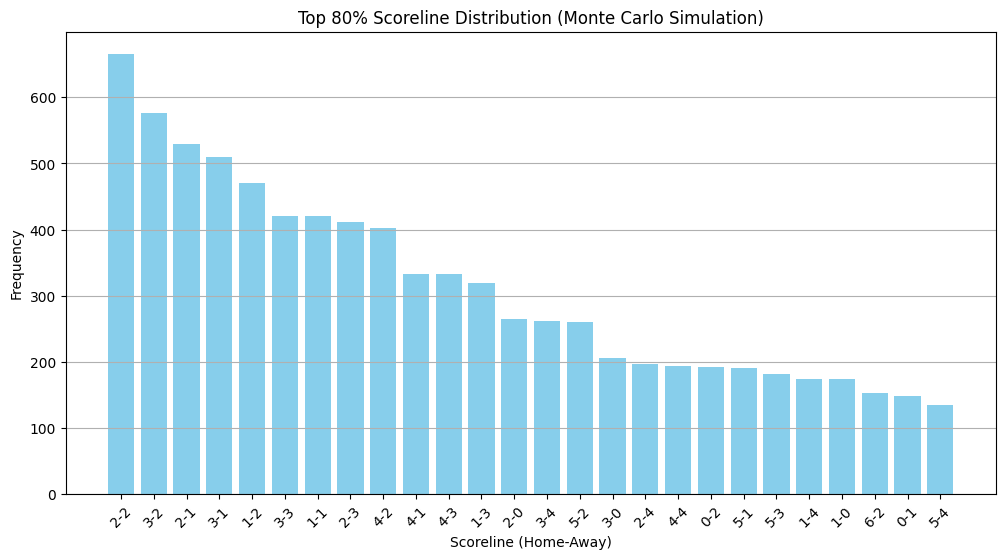

The total difference is: 0.2422695129173352
Home difference is: 0.1211347721359935
Draw difference is: -0.11920492148764075
Away difference is: -0.0019298192937009517


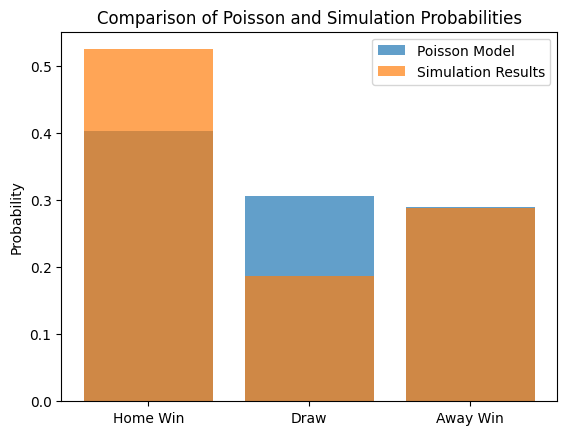

In [33]:
test_single_game_simulation("Manchester City", "Chelsea", 10000)

##### Case 2: Manchester City vs Ipswich Town
Comparing to case 1, examing a stronger team to a weaker team.
Expectation: Man City should be considerably better than Ipswich Town

Most common scoreline: (2, 0) with frequency 904
Average Home Goals: 3.0484
Average Away Goals: 0.902
Manchester City won 7922 games; Ipswich Town won 780 games; 1298 draws
Final scores: | Home : 25064 | Away: 3638 |


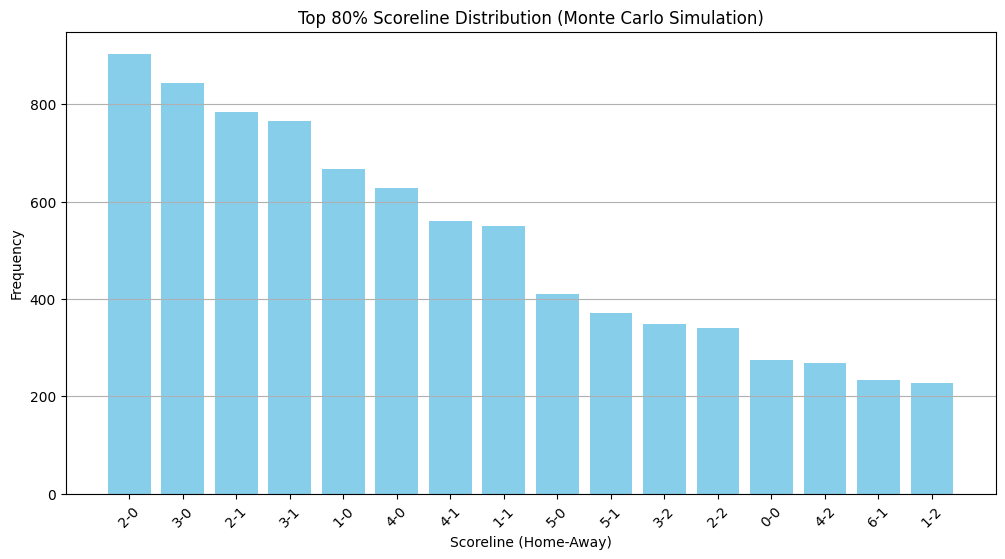

The total difference is: 0.7096902318089227
Home difference is: 0.3548451369944296
Draw difference is: -0.17626460088681686
Away difference is: -0.17858049392767622


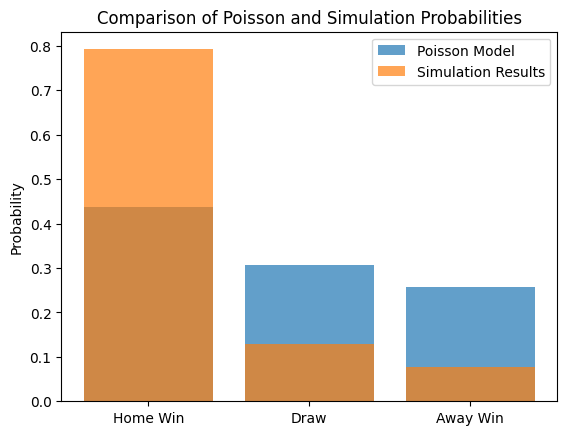

In [34]:
test_single_game_simulation("Manchester City", "Ipswich Town", 10000)

##### Case 3: Chelsea vs Manchester City
Comparing to case 1, examing the effect of being home and away team
Expectation: Man City should still be better than Chelsea, but the gap should shrink as now Chelsea is the home team

Most common scoreline: (2, 2) with frequency 601
Average Home Goals: 2.4168
Average Away Goals: 2.9484
Chelsea won 3222 games; Manchester City won 4961 games; 1817 draws
Final scores: | Home : 11483 | Away: 16700 |


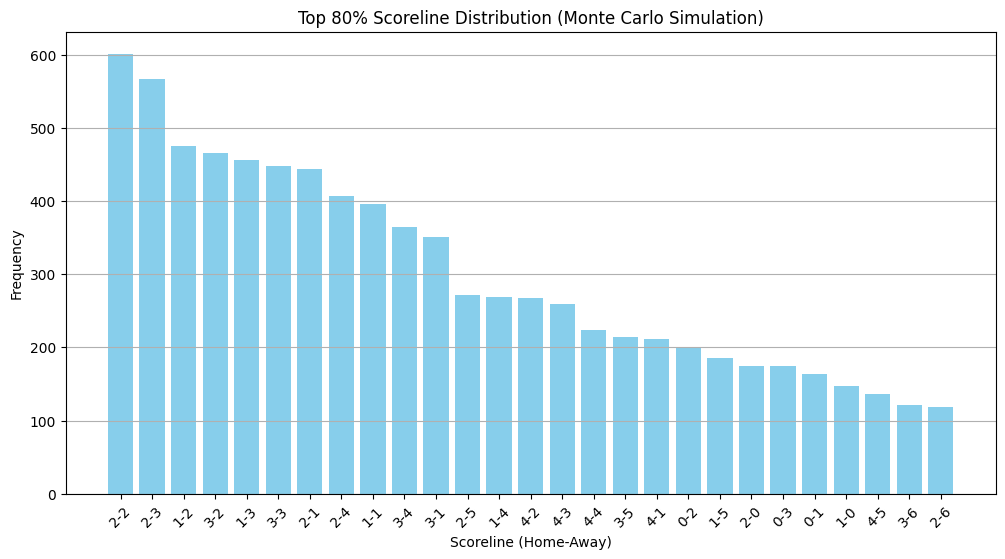

The total difference is: 0.24896224772718997
Home difference is: 0.03265713871153775
Draw difference is: -0.12448110823170702
Away difference is: 0.0918240007839452


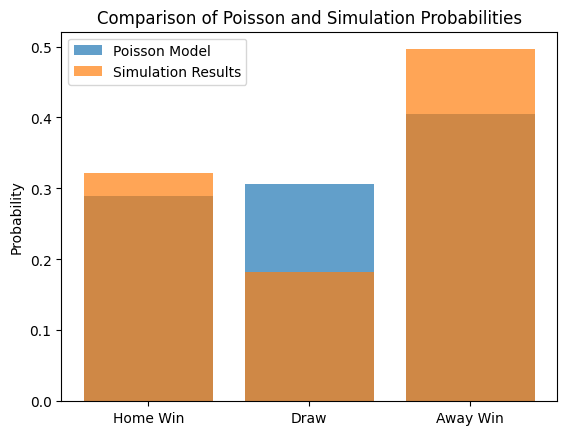

In [35]:
test_single_game_simulation("Chelsea", "Manchester City", 10000)

##### Case 4: West Ham and Manchester City
A special case: in the initial tests West Ham has a strangely high chance of winning, beating all teams including Man City.
This case is set to observe the current model's bias

Most common scoreline: (1, 2) with frequency 800
Average Home Goals: 1.4774
Average Away Goals: 2.9174
West Ham won 1692 games; Manchester City won 6630 games; 1678 draws
Final scores: | Home : 6754 | Away: 21568 |


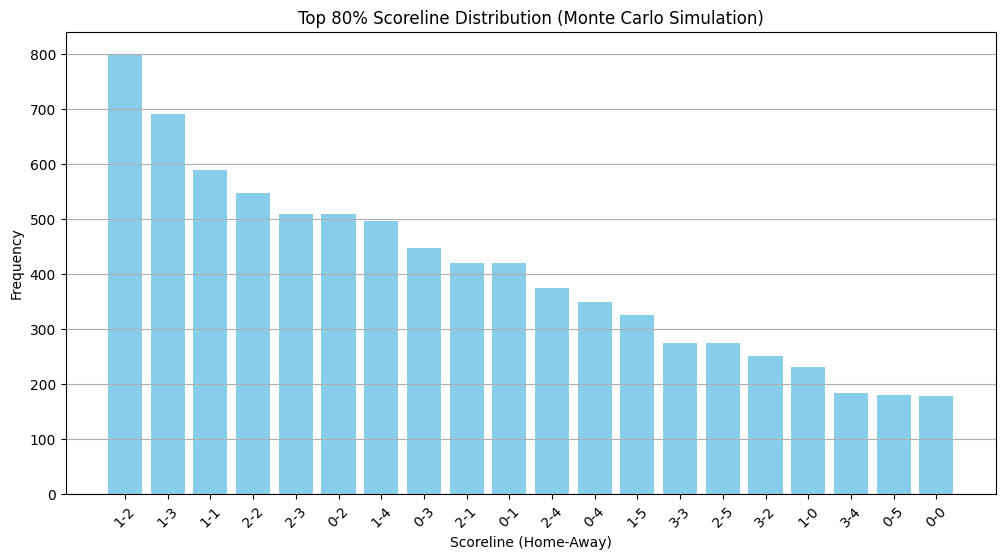

The total difference is: 0.5384153843412325
Home difference is: -0.14207431397533235
Draw difference is: -0.12713335319624497
Away difference is: 0.26920771716965514


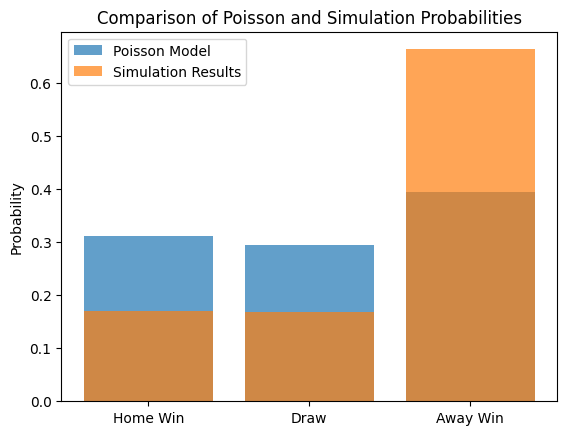

In [36]:
test_single_game_simulation("West Ham", "Manchester City", 10000)

----
### Final points prediction
The rules: 
20 teams playing each other home and away across the season, a total of 380 matches.
3 points for a win, 1 point for a draw, 0 point for defeat

In [37]:
def test_one_season():
    """
    Generate the simulation for one season, return the score board
    
    Parameters: no parameter
    
    Returns: a dictionary with team name as key, their score and goals as value
    """
    
    # Initialize season standings
    league_table = {team: {
        "points": 0,
        "goals_scored": 0,
        "goals_conceded": 0,
        "matches_played": 0,
        "wins": 0,
        "draws": 0,
        "losses": 0
    } for team in teams}
    
    num_simulations = 1000
    
    # Simulate matches for the entire season
    for home_team in teams:
        for away_team in teams:
            # Don't play against itself
            if home_team != away_team:
                # Simulate the match
                match_results = monte_carlo_match_simulation_parallel(home_team, away_team, num_simulations)
                
                # Update team statistics
                home_stats = league_table[home_team]
                away_stats = league_table[away_team]
                
                # Update matches played
                home_stats["matches_played"] += 1
                away_stats["matches_played"] += 1
                
                # Update goals
                home_stats["goals_scored"] += match_results["average_home_goals"]
                home_stats["goals_conceded"] += match_results["average_away_goals"]
                away_stats["goals_scored"] += match_results["average_away_goals"]
                away_stats["goals_conceded"] += match_results["average_home_goals"]
                
                # Update points and match results
                home_vic = match_results["home_vic"]
                away_vic = match_results["away_vic"]
                draw = num_simulations - home_vic - away_vic

                # normalised values
                nld_hv = home_vic / num_simulations
                nld_av = away_vic / num_simulations
                nld_draw = draw / num_simulations
                
                game_result = random.choices(
                    population=["home_vic", "away_vic", "draw"],
                    weights=[nld_hv, nld_av, nld_draw],
                    k=1
                )[0]
                
                if game_result == "home_vic":
                    home_stats["points"] += 3
                    home_stats["wins"] += 1
                    away_stats["losses"] += 1 
                elif game_result == "away_vic":
                    away_stats["points"] += 3
                    away_stats["wins"] += 1
                    home_stats["losses"] += 1
                else:
                    home_stats["points"] += 1
                    away_stats["points"] += 1
                    home_stats["draws"] += 1
                    away_stats["draws"] += 1 
                '''
                if draw > home_vic and draw > away_vic:
                    home_stats["points"] += 1
                    away_stats["points"] += 1
                    home_stats["draws"] += 1
                    away_stats["draws"] += 1 
                elif home_vic > away_vic: 
                    home_stats["points"] += 3
                    home_stats["wins"] += 1
                    away_stats["losses"] += 1
                else: # home_vic < away_vic
                    away_stats["points"] += 3
                    away_stats["wins"] += 1
                    home_stats["losses"] += 1
                '''
    # Sort teams by points (and potentially goal difference in future iterations)
    sorted_teams = sorted(
        league_table.items(), 
        key=lambda x: x[1]["points"], 
        reverse=True
    )
    
    # Print league table for visualization
    print("League Table:")
    print("Team".ljust(20), "Points".ljust(10), "Played".ljust(10), "Wins".ljust(10), "Draws".ljust(10), "Losses".ljust(10), "Goals Scored".ljust(15), "Goals Conceded")
    for team, stats in sorted_teams:
        print(
            team.ljust(20), 
            str(stats["points"]).ljust(10), 
            str(stats["matches_played"]).ljust(10), 
            str(stats["wins"]).ljust(10), 
            str(stats["draws"]).ljust(10), 
            str(stats["losses"]).ljust(10), 
            str(round(stats["goals_scored"], 2)).ljust(15), 
            round(stats["goals_conceded"], 2)
        )
    
    return league_table

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def visualize_league_season(league_table):
    """
    Create comprehensive visualizations of the league season results.
    
    Parameters:
    league_table (dict): Dictionary containing team statistics from the season simulation
    
    Creates multiple plots to represent league performance:
    1. Points Distribution Bar Chart
    2. Goals Scored vs Goals Conceded Scatter Plot
    3. Team Performance Radar Chart for Top Teams
    """
    # Convert league table to a DataFrame
    df = pd.DataFrame.from_dict(league_table, orient='index')
    df.reset_index(inplace=True)
    df.rename(columns={'index': 'team'}, inplace=True)
    
    # Extract data for plotting
    teams = df['team']
    points = df['points']
    goals_scored = df['goals_scored']
    goals_conceded = df['goals_conceded']
    wins = df['wins']
    
    # Create a figure with subplots
    plt.figure(figsize=(15, 10))
    plt.suptitle('League Season Performance Analysis', fontsize=16)
    
    # 1. Points Distribution Bar Chart
    plt.subplot(2, 2, 1)
    plt.bar(teams, points, color='skyblue')
    plt.title('Points Distribution')
    plt.xlabel('Teams')
    plt.ylabel('Total Points')
    plt.xticks(rotation=45, ha='right')
    
    # 2. Goals Scored vs Goals Conceded Scatter Plot
    plt.subplot(2, 2, 2)
    scatter = plt.scatter(goals_scored, goals_conceded, c=points, cmap='viridis', s=100, edgecolors='k')
    plt.colorbar(scatter, label='Points')
    plt.title('Goals Scored vs Goals Conceded')
    plt.xlabel('Goals Scored')
    plt.ylabel('Goals Conceded')
    
    # Annotate each point with team names
    for i, team in enumerate(teams):
        plt.annotate(team, (goals_scored[i], goals_conceded[i]), 
                     xytext=(5, 5), textcoords='offset points', fontsize=8)
    
    # 3. Team Performance Radar Chart for Top Teams
    # Select top 5 teams based on points
    df_sorted = df.sort_values('points', ascending=False)
    top_teams = df_sorted['team'][:5].tolist()
    performance_metrics = df_sorted[['points', 'goals_scored', 'goals_conceded', 'wins']][:5]
    
    # Normalize the data for radar chart
    metrics = ['points', 'goals_scored', 'goals_conceded', 'wins']
    performance_metrics_normalized = performance_metrics.copy()
    for metric in metrics:
        min_value = performance_metrics[metric].min()
        max_value = performance_metrics[metric].max()
        performance_metrics_normalized[metric] = (performance_metrics[metric] - min_value) / (max_value - min_value)
    
    # Number of variables we're plotting.
    categories = ['Points', 'Goals Scored', 'Goals Conceded', 'Wins']
    N = len(categories)
    
    # What will be the angle of each axis in the plot? (we divide the plot / number of variables)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Complete the loop
    
    # Initialize the spider plot
    ax = plt.subplot(2, 2, (3, 4), polar=True)
    plt.title('Top 5 Teams Performance Radar Chart', y=1.08)
    
    # Draw one axe per variable and add labels
    plt.xticks(angles[:-1], categories)
    
    # Draw ylabels
    ax.set_rlabel_position(30)
    plt.yticks([0.0, 0.5, 1.0], ["0", "0.5", "1.0"], color="grey", size=7)
    plt.ylim(0, 1)
    
    # Plot each individual team
    for i, team in enumerate(top_teams):
        values = performance_metrics_normalized.loc[performance_metrics_normalized.index[i]].tolist()
        values += values[:1]  # Complete the loop
        ax.plot(angles, values, linewidth=2, linestyle='solid', label=team)
        ax.fill(angles, values, alpha=0.1)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1.1))
    
    # Adjust layout and display
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


### Showing one season's results

In [39]:
league_results = test_one_season()

League Table:
Team                 Points     Played     Wins       Draws      Losses     Goals Scored    Goals Conceded
Manchester City      80         38         24         8          6          115.35          65.25
Tottenham            79         38         24         7          7          96.41           62.75
Chelsea              75         38         22         9          7          81.55           58.25
Crystal Palace       69         38         21         6          11         50.09           62.61
Arsenal              68         38         21         5          12         71.01           61.98
Liverpool            58         38         16         10         12         100.26          66.23
Bournemouth          52         38         13         13         12         61.77           60.9
Newcastle Utd        50         38         14         8          16         49.44           57.05
Everton              49         38         11         16         11         49.67           60.1

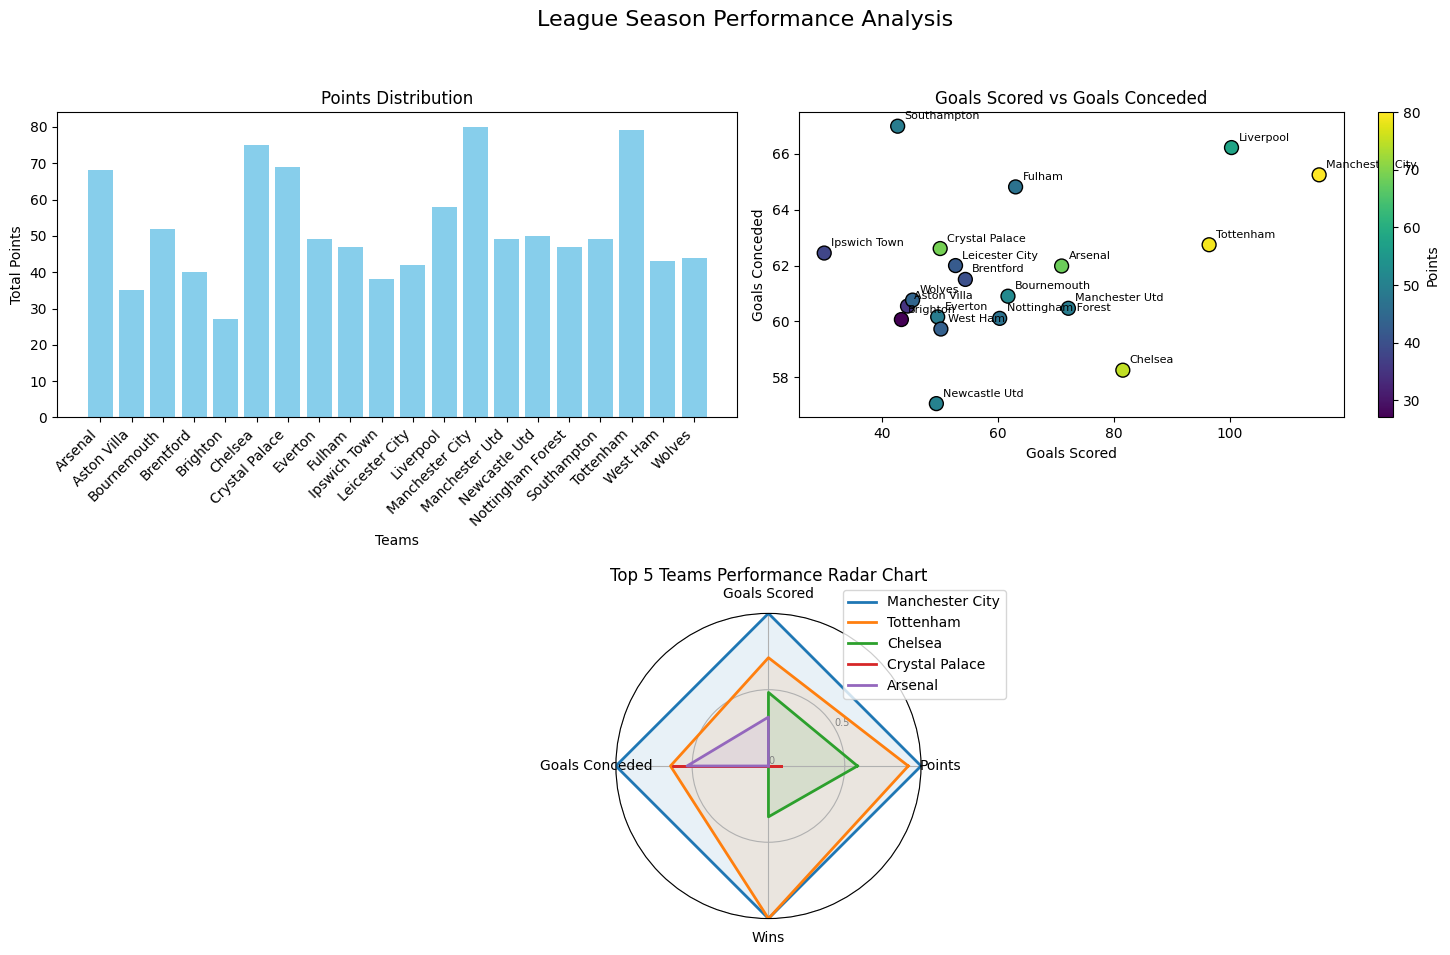

In [56]:
visualize_league_season(league_results)

##### Explanation of Data Selection and Methodology: (DATASCRAPER.py)
This script is designed to scrape, process, and store soccer player data from FBRef to provide detailed statistics for analysis and simulation. Below is a breakdown of why specific data points, methods, and structures were chosen.

1. Purpose of the Script
    - To gather detailed team and player statistics for the English Premier League.
    - To structure data for downstream tasks like match simulation, analysis, or visualization.
    - To automate the collection of consistent and reliable data using web scraping.
2. Key Features of the Script
    - 2.1 Data Collection and Saving
        - Saving HTML files (save_html):
            - HTML files are saved locally to reduce redundant requests to the source site.
            - This improves performance and prevents accidental breaches of scraping ethics by limiting unnecessary server requests.
        - Reading HTML files (read_html):
            - Files are read from local storage for parsing, ensuring the script can work offline and/or for debugging purposes.

    - 2.2 Data Selection
        - Teams and Players
            - The script starts with the Premier League's main page, identifying teams and their associated URLs.
            - Each team page contains detailed player data, including:
                - Player names
                - Positions
                - URLs for individual player pages
                - Player Statistics
                - Players are categorized into goalkeepers and outfielders, as their roles and relevant statistics differ significantly:

        - Goalkeepers:
            - Save Percentage: A crucial metric to evaluate the efficiency of goalkeepers.
            - Games Played and Starts: Reflect the player's reliability and consistency.
            - Stats for Current Team: Provide insights into recent performance.
        
        - Outfield Players:
            - Tackles Per Game: A defensive metric to measure tackling efficiency.
            - Interceptions Per Game: Another defensive statistic to measure the player's ability to disrupt opponents' plays.
            - Shots Per Game: Measures offensive contributions in terms of attempts on goal.
            - Passes Per Game: Highlights the player's involvement in ball distribution.
            - Progressive Passes Received Per Game: Indicates the player's ability to receive forward passes and create opportunities.
            - Progressive Carries Per Game: Reflects the player's ability to move the ball forward during possession.
            
        - Why These Metrics?

           - These statistics were chosen as they provide a balanced view of a player's defensive, offensive, and transitional abilities.
           - Metrics are normalized on a per-game basis for fair comparisons across players with varying playtimes.

    - 2.3 Data Processing
        - Class Design
            - Team Class:
                - Represents teams with basic attributes like name and URL.
                - Provides an abstraction to manage team-level data.

            - Player Class:
                - Represents players with attributes for personal details, positions, and various statistics.
                - Includes methods (setGKStats and setOutfielderStats) to calculate and set stats.

            - Data Transformation
                - Player statistics from the site are often career totals. These totals are normalized using the number of matches played to produce per-game metrics, ensuring comparability:

                - ```python
                  self.tacklesPG = tackles / matchesPlayed
                 ```    
    - 2.4 Data Storage
        - Players are converted to dictionaries using the to_dict method and then saved as JSON:
        python

       ```json {
            "name": "Player Name",
            "position": "MF",
            "team": "Team Name",
            "isGoalkeeper": false,
            "tacklesPG": 1.2,
            ...
        }
        ```

    - 2.5 Why JSON?
        - JSON is lightweight, human-readable, and widely used in data analysis workflows.


3. Why FBRef?
    - Comprehensive Coverage:
        - FBRef provides a wide range of statistics, including advanced metrics.

    - Reliable Data Source:
        - The site is frequently updated, ensuring data accuracy and relevance.

    - Structured HTML:
        - FBRef's HTML structure is well-organized, simplifying data extraction with tools like BeautifulSoup.

4. Limitations and Improvements
    - The script heavily relies on the HTML structure of FBRef, making it sensitive to changes on the site.

    - Potential Improvements: 
        - Database Integration:
            - Store data in a relational database (e.g., SQLite or PostgreSQL) for advanced querying.

5. Conclusion
    - This script leverages ethical scraping and efficient data processing to gather valuable soccer data. By focusing on key metrics and leveraging structured storage, it serves as a foundation for soccer analytics and simulation applications.